In [2]:
# compress data
!unzip ./drive/My\ Drive/captcha/captchas.zip 

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: captchas/QT5J.jpg       
  inflating: captchas/CDCQ.jpg       
  inflating: captchas/8BY6.jpg       
  inflating: captchas/EKTA.jpg       
  inflating: captchas/TBG2.jpg       
  inflating: captchas/GXMX.jpg       
  inflating: captchas/4QBC.jpg       
  inflating: captchas/67MK.jpg       
  inflating: captchas/ZNPR.jpg       
  inflating: captchas/3VGW.jpg       
  inflating: captchas/6NN7.jpg       
  inflating: captchas/96U6.jpg       
  inflating: captchas/Z28F.jpg       
  inflating: captchas/B5Q2.jpg       
  inflating: captchas/QZN3.jpg       
  inflating: captchas/RHMZ.jpg       
  inflating: captchas/U6HH.jpg       
  inflating: captchas/27P3.jpg       
  inflating: captchas/PG2X.jpg       
  inflating: captchas/3AD7.jpg       
  inflating: captchas/CTFV.jpg       
  inflating: captchas/9ZNT.jpg       
  inflating: captchas/6P3R.jpg       
  inflating: captchas/9VXC.jpg       
  inflating: captchas/Q8XY.jpg       
  inflating: captchas/X

In [3]:
from train import train

if __name__ == '__main__':
  train('./captchas', batch_size=512, learning_rate=0.001, epochs=100, model_dir='./model')


/content/train.py:104: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)
/content/train.py:105: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


/content/train.py:139: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=False)
/content/train.py:140: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, requires_grad=False)


(100, 2)


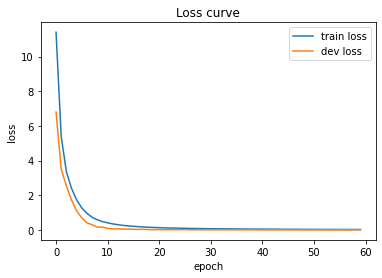

In [4]:
# plot
import json
import matplotlib.pyplot as plt
import numpy as np
import os

with open(os.path.join('./history', 'history_epoch_train.json'), mode='r') as in_fp:
  batch_his_train = json.load(in_fp)

with open(os.path.join('./history', 'history_epoch_dev.json'), mode=r'r') as in_fp:
  batch_his_dev = json.load(in_fp)

batch_his_train = np.array(batch_his_train)
batch_his_dev = np.array(batch_his_dev)
print(batch_his_dev.shape)
# batch_his_dev = np.array([np.mean(batch_his_dev[i:i+12,:], axis=0) for i in range(100)])

batchs = list(range(batch_his_train.shape[0]))
plt.figure()
plt.title('Loss curve')
plt.plot(batchs[:60], batch_his_train[:60,0], label='train loss')
plt.plot(batchs[:60], batch_his_dev[:60,0], label='dev loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.savefig('./loss.svg')
plt.show()

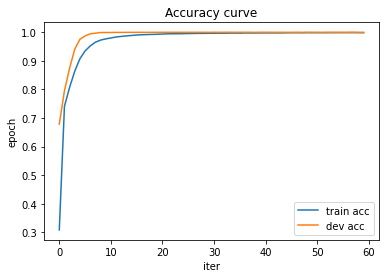

In [5]:
plt.figure()
plt.title('Accuracy curve')
plt.plot(batchs[:60], batch_his_train[:60,1], label='train acc')
plt.plot(batchs[:60], batch_his_dev[:60,1], label='dev acc')
plt.xlabel('iter')
plt.ylabel('epoch')

plt.legend()
plt.savefig('./acc.svg')
plt.show()

In [1]:
from eval import eval

eval('./model/model-latest.pkl', './captchas')

Eval:   0%|          | 0/95 [00:00<?, ?it/s]/content/eval.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=False)
/content/eval.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, requires_grad=False)
Eval: 100%|██████████| 95/95 [00:00<00:00, 126.72it/s, acc=1]


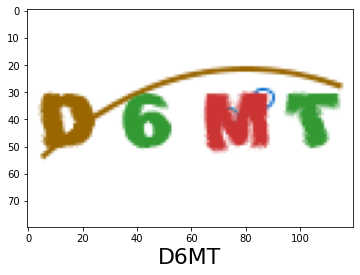

In [12]:
from predict import predict

import matplotlib.pyplot as plt

from PIL import Image

path = './captchas/D6MT.jpg'

res = predict(path, model_dir='./model/model-latest.pkl', use_gpu=True)

plt.figure()
img_pil = Image.open(path)
plt.xlabel(res, fontdict={'fontsize': 22})
plt.imshow(img_pil)
# print('验证码识别结果：' + res)